# Проект о продаже компьютерных игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны  данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Необходимо отработать принцип работы с данными. 

## Изучение данных из файла

In [ ]:
# получение таблицы  и импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [1]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# получение общей информации о данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


###  Вывод

В таблице 16715 строк и 11 столбцов, представлены данные типов object и float64. Судя по количеству данных в столбцах Year_of_Release, Critic_Score, User_Score и Rating присутствуют пропуски. Также видим в заголовках столбцов нарушения регистра - заглавные буквы.

## Подготовка данных

In [3]:
# приведем данные к нижнему регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# поменяем тип данных в Year_of_Release на datetime
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [5]:
# в графе user_score можно поменять данные на float  и заменить значения tbd (подлежит уточнению) на nan
data['user_score'].unique()
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

In [6]:
# в столбце rating просмотрели данные, заменим пропуски на indefinite
data['rating'].unique()
data['rating'] = data['rating'].fillna('indefinite')

In [7]:
# посмотрим на пропуски
# используем метод isna(), чтобы найти пропущенные значения в столбцах, где данные, очевидно, пропущенны
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Доля пропусков в name и genre составляет 1%, с ними можно ничего не делать

In [8]:
# пропусков в годах не так много (1.6%), их можно удалить
data.dropna(subset = ['year_of_release'], inplace=True)

In [9]:
# считаем выручку по всем регионам и записываем ее в новый столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,indefinite,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,indefinite,31.38


### Вывод

По итогам предобработки данных были заменены типы данных в Year_of_Release на datetime и в графе user_score - на float. 
В столбце rating пропуски заменила на indefinite, так как пропуски будут мешать при будущем анализе.
Пропуски в year_of_release удалили, так как их доля составляет 1.6%.
Названия столбцов приведены к нижнему регистру.
Также был создан столбец с подсчетами общей выручки по всем регионам.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

,number_of_games
year_of_release,
2008-01-01,1427
2009-01-01,1426
2010-01-01,1255
2007-01-01,1197
2011-01-01,1136
2006-01-01,1006
2005-01-01,939
2002-01-01,829
2003-01-01,775


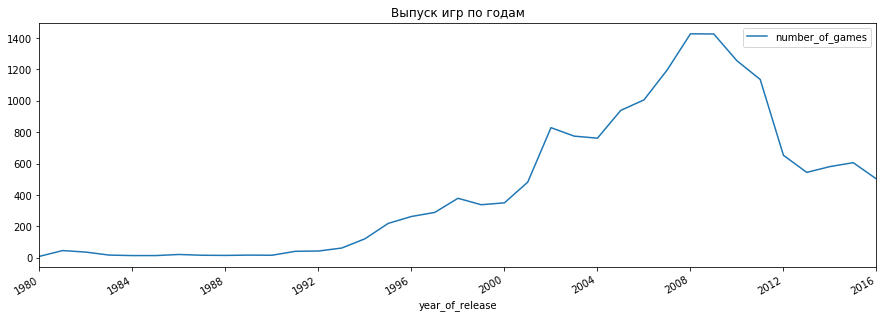

In [10]:
# группируем количество игр по годам и сортируем в порядке убывания
game_years = data.groupby(['year_of_release']).agg({'year_of_release' : 'count'})
game_years.columns = ['number_of_games']
display(game_years.sort_values(by='number_of_games', ascending = False))
game_years.sort_values(by='number_of_games', ascending = False).plot(figsize=(15,5), title = 'Выпуск игр по годам')

Из таблицы и графика видно, что большинство игр выходило в период с 2002 по 2011 годы, в 2012 наблюдалось падение выпуска игр, с тех пор рост оставался незначительным. Пик выпуска игр наблюдался с 2007 по 2009 года.

### На каких платформах выпускались игры в разные годы

In [11]:
# построим таблицу, где можно будет увидеть платформы c наиболььшим количеством продаж
platform_sales = data.groupby(['platform']).agg({'total_sales' : 'sum'})
platform_sales.columns = ['platform_sales']
display(platform_sales.sort_values(by='platform_sales', ascending = False))

,platform_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из таблицы видно, что самыми популярными платформами были PS2, X360, PS3, Wii.

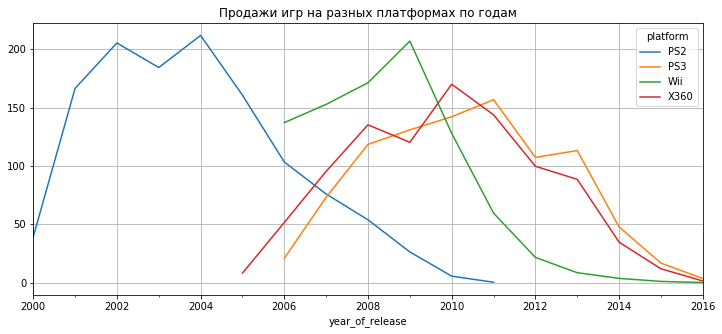

In [12]:
data.query('platform in ["PS2", "X360", "PS3", "Wii"]').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5), title = 'Продажи игр на разных платформах по годам')


Из таблицы и графика видно, что пик продаж игровой платформы длится примерно 5 лет, после чего продажи спадают.

### Какие платформы лидируют по продажам, растут или падают на основе данных актуального периода

На основе проанализированных данных можно выделить актуальный период для дальнейшего анализа и прогнозирования  - 2 года. 
Во-первых, стоит помнить о специфике индустрии. Продукты геймдева могут вести себя непредсказуемо, с учетом этого, стоит оставаться в рамка краткосрочного или среднесрочного периодов. 
Во-вторых, жизнь платформы составляет 5 лет, что включает в себя рост и постепенный спад популярности.
На основе этих доводов стоит брать период для анализа не более 2 лет.


In [13]:
# создадим датафрем с актульным периодом
actual_data = data.query('year_of_release > 2014')
display(actual_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,indefinite,14.63
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,indefinite,7.98
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,indefinite,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,indefinite,0.01


,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


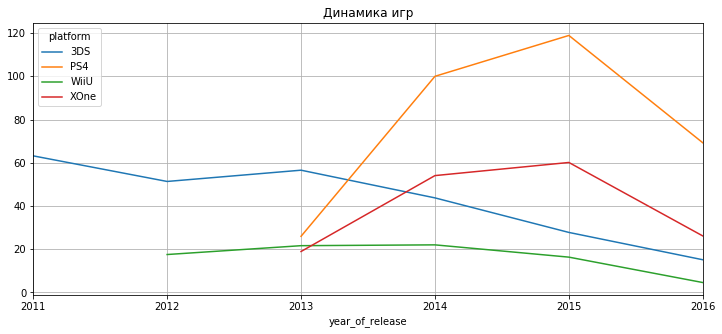

In [14]:
# построим таблицу, чтобы увидеть,какие платформы лидируют по продажам, растут или падают
leading_platforms = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
display(leading_platforms.sort_values(by='total_sales', ascending=False))
data.query('platform in ["PS4", "XOne", "3DS", "WiiU"]').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5), title = 'Динамика игр')

Из таблицы и графика видно, что самые высокие показатели в продажах за 2015 и 2016 год имеют платформы PS4, XOne и 3DS. 
Однако на графике видно, что их продажи все равно снижаются с 2015 года.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Text(0.5, 1.0, 'Глобальные продажи игр по платформам')

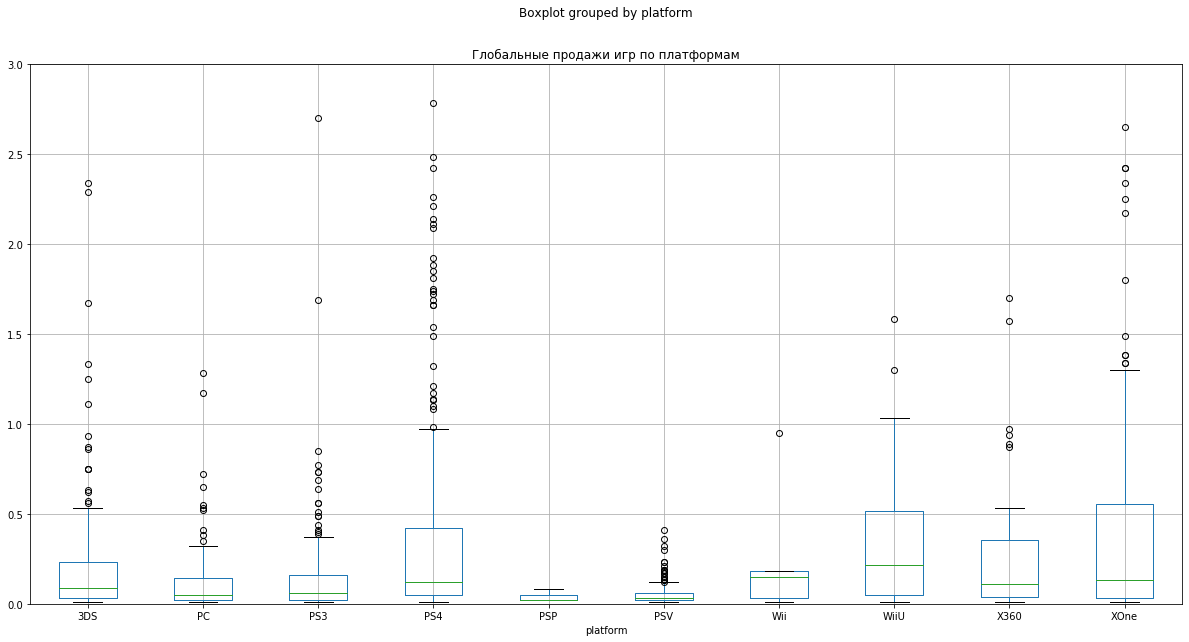

In [15]:
actual_data.boxplot(column = 'total_sales', by='platform', figsize=(20,10))
plt.ylim(0, 3)
plt.title('Глобальные продажи игр по платформам')

Построив графики типа boxplot видно, что в XOne имела самые высокие продажи (верхняя граница квартиля), за ней следует PS4 и WiiU. При этом их медианные значения (зеленая линяя) не сильно различаются. Также для PS4 наблюдается большое число выбросов. Для XOne, 3DS и WiiU их меньше. Выбросы видны за верхней границей, они обозначаются точками. 

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

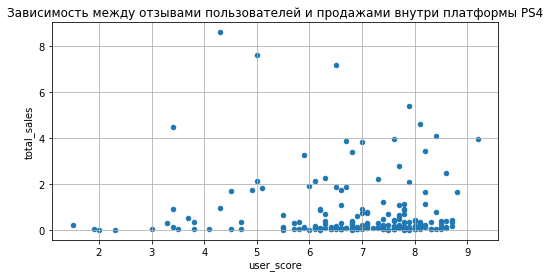

-0.05973845712638215


In [16]:
# Далее необходимо выявить засисимости между отзывами пользователей и продажами внутри платформы PS4
PS4_user_score = actual_data.query('platform == "PS4"')
PS4_user_score.plot(kind = 'scatter', x='user_score', y='total_sales', title ='Зависимость между отзывами пользователей и продажами внутри платформы PS4',  grid=True, figsize=(8,4))
plt.show()
# посчитываем корреляцию
print(PS4_user_score['total_sales'].corr(PS4_user_score['user_score']))

Из диаграммы рассеяния и из коэффициента корреляции, что зависимость между оценкой пользователей и продажами практически отсутствует.

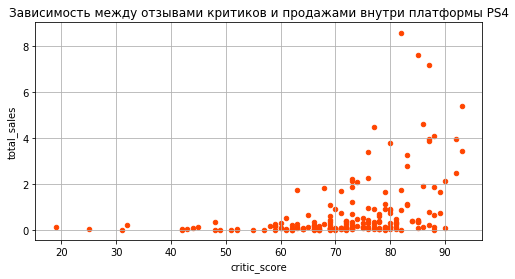

0.3928485555130601


In [17]:
# Далее необходимо выявить засисимости между отзывами критиков и продажами внутри платформы PS4
PS4_critic_score = actual_data.query('platform == "PS4"')
PS4_critic_score.plot(kind = 'scatter', x='critic_score', y='total_sales', title ='Зависимость между отзывами критиков и продажами внутри платформы PS4', color='orangered',  grid=True, figsize=(8,4))
plt.show()
# посчитываем корреляцию
print(PS4_critic_score['total_sales'].corr(PS4_critic_score['critic_score']))

Отзовы критиков сильнее влияют на продажи. Диаграмма показывает рост продаж там, где оценки критиков выше. Также коэффициент корреляции Пирсона равен 0.39. это говорит о наличии зависимости, хоть она и не слишком сильная.

### Влияние отзывов пользователей и критиков на продажи игр на других платформах

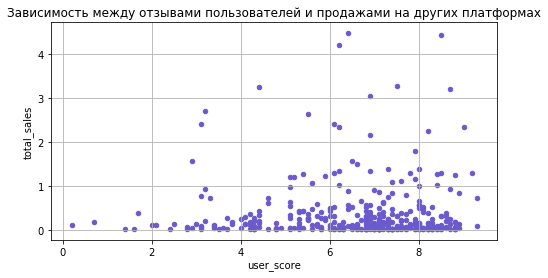

0.017521130656321507


In [18]:
# необходимо выделить другие платформы и посмотрим зависимость между продажами и отзывами пользователей
other_user_score = actual_data.query('platform != "PS4"')
other_user_score.plot(kind = 'scatter', x='user_score', y='total_sales', title ='Зависимость между отзывами пользователей и продажами на других платформах', color='slateblue',  grid=True, figsize=(8,4))
plt.show()
# посчитываем корреляцию
print(other_user_score['total_sales'].corr(other_user_score['user_score']))


На других платформах отзывы пользователей тоже не влияют на продажи.

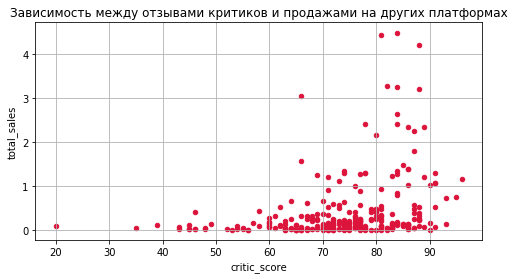

0.30324302098520883


In [19]:
# необходимо выявить засисимости между отзывами критиков и продажами на других платформах
other_critic_score = actual_data.query('platform != "PS4"')
other_critic_score.plot(kind = 'scatter', x='critic_score', y='total_sales', title ='Зависимость между отзывами критиков и продажами на других платформах', color='crimson',  grid=True, figsize=(8,4))
plt.show()
# посчитываем корреляцию
print(other_critic_score['total_sales'].corr(other_critic_score['critic_score']))

Внутри других платформ также видна пположительная зависимость между оценками критиков и продажами, она немного слабее, чем для платформы PS4.

### Общее распределение игр по жанрам

In [32]:
# посмотрим, какие жанры прибыльнее других
leading_genres = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
display(leading_genres.sort_values(by='total_sales', ascending=False))


,total_sales
genre,
Shooter,0.380
Sports,0.120
Role-Playing,0.115
Platform,0.100
Simulation,0.100
Fighting,0.090
Action,0.060
Misc,0.060
Racing,0.055


В таблице видно, что самыми прибыльными жанрами являются жанры Shooter, Sports и Role-Playing.
Жанры с самым низким рейтингом продаж это: Puzzle, Strategy и Adventure.

### Вывод по исследовательскому анализу данных

В исследовательском анализе данных было определено следующее.

1) Выявлено сколько игр выпускалось в разны годы. Большинство игр выходило в период с 2002 по 2011 годы, в 2012 наблюдалось падение выпуска игр, с тех пор рост оставался незначительный. Пик выпуска игр наблюдался с 2007 по 2009 года.

2) Продажи игр на разных платформах по годам, что позволило установить, что средняя продолжительность "жизни" платформы 5 лет.

3) Установлен актуальный период (2 года) для основы будущего анализа. Также было определено, что в актуальном периоде лидирующими платформами являются PS4, XOne и 3DS.

4) Далее было выявлено, что оценки пользователей не влияют на продажи игр, в то время как оценки критиков, наоборот, показывают определенную корреляцию с продажами, но эта зависимость слабая.

5) Было определено, что самые прибыльные жанры это Shooter, Sports и Role-Playing.

## Портрет пользователя каждого региона

### Популярные платформы по регионам

In [21]:
# выделим топ-5 платформ в Северной Америке
na_top_platforms = actual_data.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
na_top_platforms['na_share, %'] = na_top_platforms['na_sales'] / na_top_platforms['total_sales'] * 100
display(na_top_platforms.sort_values(by='na_sales', ascending=False).head(5))

,na_sales,total_sales,"na_share, %"
platform,,,
PS4,63.86,188.15,33.941005
XOne,50.30,86.29,58.291807
3DS,10.31,42.92,24.021435
WiiU,8.86,20.95,42.291169
X360,8.05,13.48,59.718101


В таблице видно рейтинг продаж по платформам в Северной Америке. Самая большая доля от общих продаж у XOne и X360. Возможно на них выпускаются самые популярные игры.

In [22]:
# выделим топ-5 платформ в Европе
eu_top_platforms = actual_data.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
eu_top_platforms['eu_sales, %'] = eu_top_platforms['eu_sales'] / eu_top_platforms['total_sales'] * 100
display(eu_top_platforms.sort_values(by='eu_sales', ascending=False).head(5))

,eu_sales,total_sales,"eu_sales, %"
platform,,,
PS4,83.54,188.15,44.400744
XOne,28.10,86.29,32.564608
PC,9.10,13.77,66.085694
3DS,7.39,42.92,17.218080
PS3,7.30,20.42,35.749265


В таблице видно рейтинг продаж по платформам в Европе. Самая большая доля от общих продаж у PC и PS4, хотя в абсолютном выражении первые 2 места занимает PS4 и XOne.

In [23]:
# выделим топ-5 платформ в Японии
jp_top_platforms = actual_data.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
jp_top_platforms['jp_sales, %'] = jp_top_platforms['jp_sales'] / jp_top_platforms['total_sales'] * 100
display(jp_top_platforms.sort_values(by='jp_sales', ascending=False).head(5))

,jp_sales,total_sales,"jp_sales, %"
platform,,,
3DS,23.55,42.92,54.869525
PS4,12.05,188.15,6.404465
PSV,8.41,10.50,80.095238
PS3,4.97,20.42,24.338883
WiiU,4.12,20.95,19.665871


В Японии лидиует 3DS по количеству продаж, однако ее относительная доля занимает второе место - 55%. PSV, занимая 80% всех продаж, третяя по популярности платформа. Возможно на ней вышла очень популярная игра, которая продавалась только в Японии.

### Популярные жанры по регионам

In [24]:
# выделим топ-5 жанров в Северной Америке
na_top_genres = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
display(na_top_genres.sort_values(by='na_sales', ascending=False).head(5))

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


Американцы любят Shooter, Action и Sports.

In [25]:
# выделим топ-5 жанров в Европе
eu_top_genres = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
display(eu_top_genres.sort_values(by='eu_sales', ascending=False).head(5))

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


Европейцы тоже любят Shooter, Action и Sports, но стрелять любят немного меньше американцев.

In [26]:
# выделим топ-5 жанров в Японии
jp_top_genres = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
display(jp_top_genres.sort_values(by='jp_sales', ascending=False).head(5))

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


Япония предпочитает Action и Role-Playing. Стрелялки занимают всего 3%, в то время как Sport вообще не вошел в топ-5. 

### Влияние рейтинга ESRB на продажи в регионах

Text(0.5, 1.0, 'Влияние рейтинга ESRB на продажи в Северной Америке')

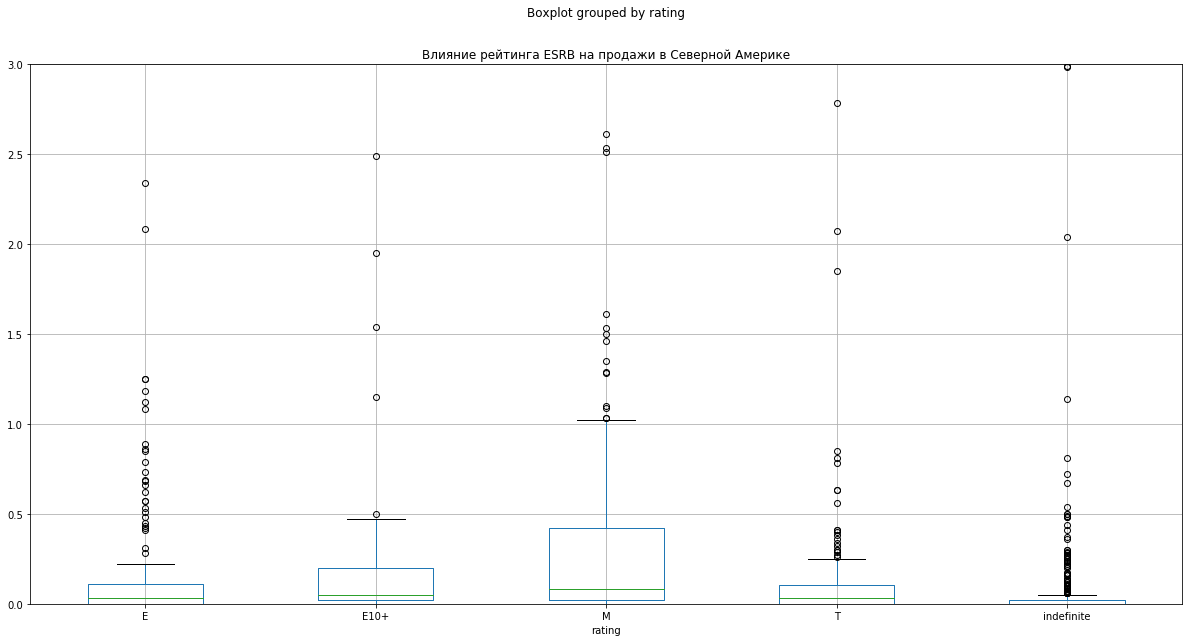

In [27]:
# построим гистограмму размаха, чтобы посмотреть, как влияет рейтинг ESRB на продажи в Северной Америке
actual_data.boxplot(column ='na_sales', by='rating', figsize=(20,10))
plt.ylim(0, 3)
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')

Из диаграммы размаха видно, где проходит медиана. По ней можно оценить, как вляет рейтиинг на продажи в регионе. 
В данном случае самые высокие продажи у игр с рейтингом М, далее следует Е10+, Е и Т, три последних находятся примерно на одном уровне.

Text(0.5, 1.0, 'Влияние рейтинга ESRB на продажи в Европе')

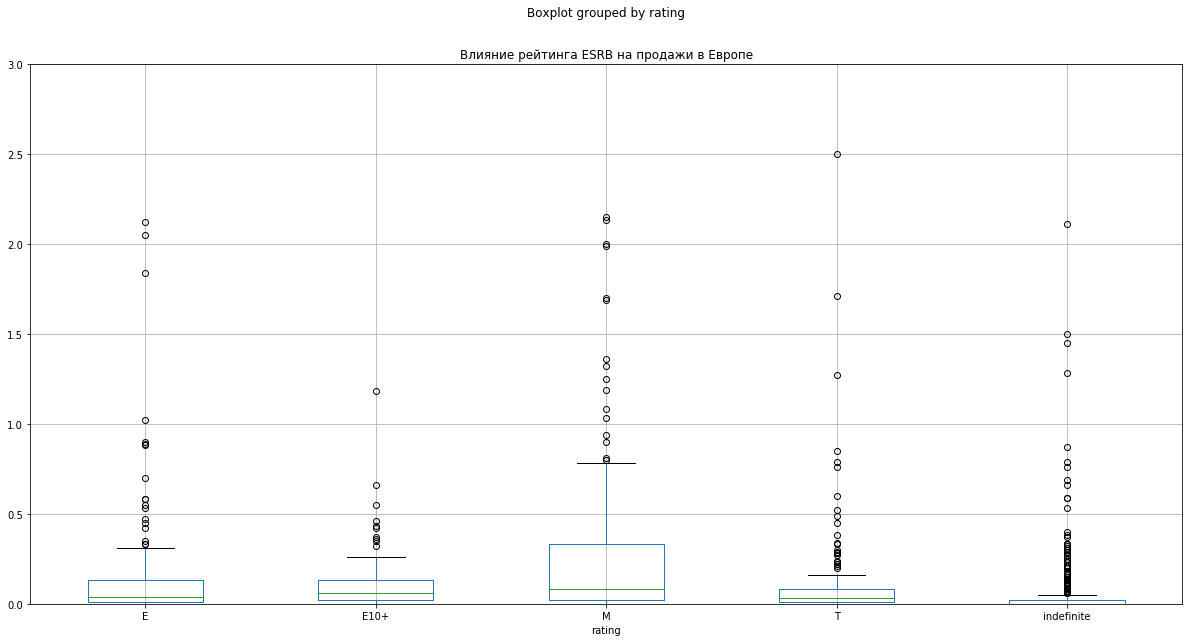

In [28]:
# построим гистограмму размаха, чтобы посмотреть, как влияет рейтинг ESRB на продажи в Европе
actual_data.boxplot(column ='eu_sales', by='rating', figsize=(20,10))
plt.ylim(0, 3)
plt.title('Влияние рейтинга ESRB на продажи в Европе')

В Европе случае самые высокие продажи у игр с рейтингом М, далее следет Е10+ и Е.

Text(0.5, 1.0, 'Влияние рейтинга ESRB на продажи в Японии')

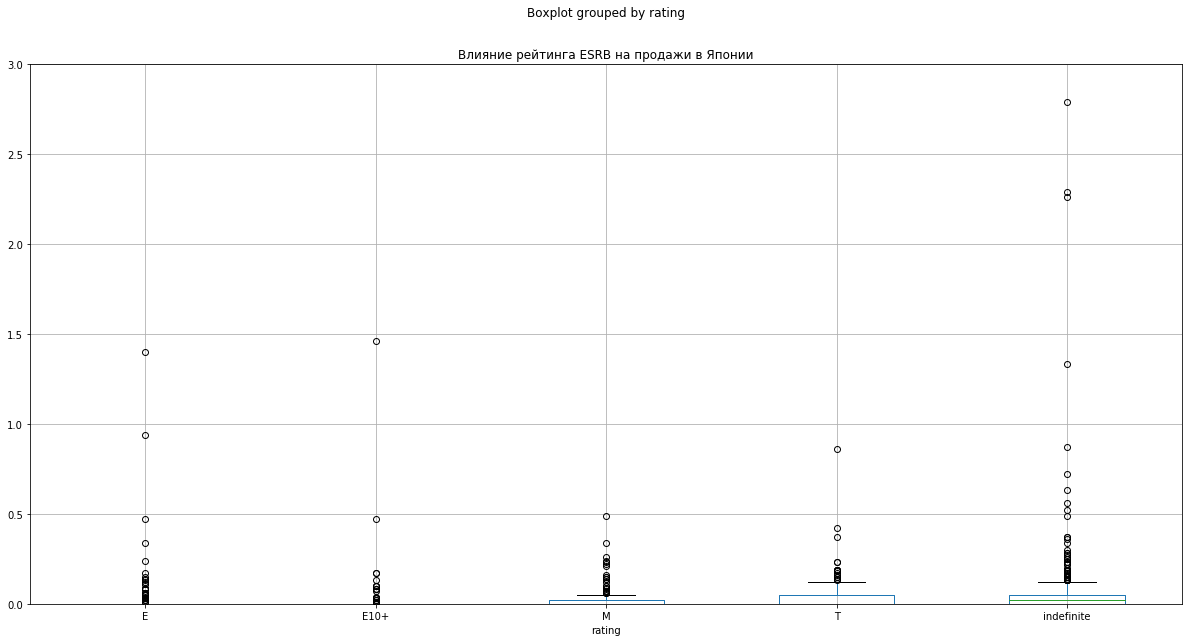

In [29]:
# построим гистограмму размаха, чтобы посмотреть, как влияет рейтинг ESRB на продажи в Японии
actual_data.boxplot(column ='jp_sales', by='rating', figsize=(20,10))
plt.ylim(0, 3)
plt.title('Влияние рейтинга ESRB на продажи в Японии')

В Японии тяжело определить влияние рейтинга. В случае, где медиана просматривается, рейтинг не определен. Это можно объяснить тем, что в Японии не присваивается рейтинг, который существует для игр в Северной Америке и Европе.

### Вывод по портретам пользователя

Портрет пользователя в Северной Америке:
- топ-5 платформ PS4 (33% рынка), XOne (58% рынка), 3DS (24% рынка), WiiU (42% рынка) и X360 (59% рынка);
- топ-5 жанров Shooter, Action, Sports, Role-Playing, Misc;
- самые высокие продажи у игр с рейтингом М, далее следет Е10+, Е и Т.

Портрет пользователя в Европе:
- топ-5 платформ PS4 (44% рынка), XOne (32% рынка), PC (66% рынка), 3DS (17% рынка) и PS3 (35% рынка);
- топ-5 жанров Shooter, Action, Sports, Role-Playing, Racing;
- самые высокие продажи у игр с рейтингом М, далее следет Е10+ и Е.

Портрет пользователя в Японии:
- топ-5 платформ 3DS (55% рынка), PS4 (6% рынка), PSV (80% рынка), PS3 (24% рынка) и WiiU (20% рынка);
- топ-5 жанров Action, Role-Playing, Shooter, Misc, Adventure;
- рейтинг ESRB не используется в Японии.

Таким образом, самая популярная платформа в Северной Америке и Европе - это PS4, в Японии она занимает 2 место. В Европе и Америке XOne также пользуется большой популярностью, в то время как в Европе она не вошла в топ-5. В Японии нна первом месте рейтинга 3DS, в Европе и СА она не так популярна. 

Северная Америка и Европа имеет схожие вкусы в жанрах - Shooter, Action, Sports, Role-Playing на первых метах. В Японии же на первых местах среди жанров Action, Role-Playing, Shooter.

Рейтинг ESRB, очевидно, используется только в СА и Европе.



## Проверка гипотез

### Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Зададим условие, что пользовательские рейтинги платформ Xbox One и PC одинаковые - H0 (нулевая гипотеза), тогда Н1 (альтернаятиная гипотеза) утверждает, что рейтинги платформ Xbox One и PC разные.
Зададим пороговое значение 5% и проверим двустороннюю гипотезу.

In [30]:
xbox_users = actual_data.query('platform == "XOne"')
pc_users = actual_data.query('platform == "PC"')

xbox_users.dropna(subset = ['user_score'], inplace=True)
pc_users.dropna(subset = ['user_score'], inplace=True)

alpha = .05
results = st.ttest_ind(
    xbox_users['user_score'],
    pc_users['user_score'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу - пользовательский рейтинг у Xbox One и PC одинаковый.

### Проверка гипотезы, что cредние пользовательские рейтинги жанров Action и Sports разные.

Зададим условие, что пользовательские рейтинги жанров Action и Sports одинаковые - H0 (нулевая гипотеза), тогда Н1 (альтернаятиная гипотеза) утверждает, что рейтинги жанров Action и Sports разные. Зададим пороговое значение 5% и проверим двустороннюю гипотезу.

In [31]:
action_lovers = actual_data.query('genre == "Action"')
sport_lovers = actual_data.query('genre == "Sports"')

action_lovers.dropna(subset = ['user_score'], inplace=True)
sport_lovers.dropna(subset = ['user_score'], inplace=True)

alpha = .05
results = st.ttest_ind(
    action_lovers['user_score'],
    sport_lovers['user_score'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение 1.0012846807938657e-13
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - рейтинги жанров Action и Sports разные.

### Вывод по гипотезам

После проведения t-теста определили, что
- пользовательский рейтинг у Xbox One и PC одинаковый;
- пользовательский рейтинг жанров Action и Sports разный.

## Общий вывод

Аналитический отчет подготовлен для Интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. На основе данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) необходимо было выявить определяющие успешность игры закономерности для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Были доступны данные до 2017 года. 

На начальном этапе анализа данные были изучены и подготовлены к дальнейшей работе. 
В таблице 16715 строк и 11 столбцов, представлены данные типов object и float64. 
По итогам предобработки данных были заменены типы данных в Year_of_Release на datetime и в графе user_score - на float. В столбце rating пропуски заменили на indefiniteю. Пропуски в year_of_release удалили, так как их доля составляет 1.6%. Названия столбцов приведены к нижнему регистру. Также был создан столбец с подсчетами общей выручки по всем регионам.

На следующем этапе был проведен исследовательский анализ данных.
В исследовательском анализе данных было определено сколько игр выпускалось в разны годы, проанализированы продажи игр на разных платформах по годам, что позволило установить, что средняя продолжительность "жизни" платформы 5 лет. Был установлен актуальный период (2 года) для основы будущего анализа. Также было определено, что в актуальном периоде лидирующими платформами являются PS4, XOne и 3DS. Далее было выявлено, что оценки пользователей не влияют на продажи игр, в то время как оценки критиков, наоборот, показывают определенную корреляцию с продажами, но эта зависимость слабая. Также удалось определить самые прибыльные жанры, это  Shooter, Sports и Role-Playing.

Далее составили был составлен пользовательский портрет по Северной Америке, Европе и Японии. 
По итогам анализа, выяснили, что самая популярная платформа в Северной Америке и Европе - это PS4, в Японии она занимает 2 место. В Европе и Америке XOne также пользуется большой популярностью, в то время как в Европе она не вошла в топ-5. В Японии на первом месте рейтинга 3DS, в Европе и СА она не так популярна. Северная Америка и Европа предпочитают те же жанры - Shooter, Action, Sports, Role-Playing на первых метах. В Японии же на первых местах среди жанров Action, Role-Playing, Shooter.
Рейтинг ESRB, очевидно, используется только в СА и Европе.

По итогам статистического анализа подтвердилась гипотеза, что пользовательский рейтинг у Xbox One и PC одинаковый, и что пользовательский рейтинг жанров Action и Sports разный.

Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, необходимо учитывать следующие факторы:
- необходимо понимать, в каких регионах какие платформы сейчас популярны. С учетом того, что платформа живет около 5 лет, необходимо учитывать стадию ее развития.
- важно понимать, в каком регионе какая платформа популярна. 
- стоит уделить внимание на то, какие жанры предпочитает целевая аудитория в конкретном регионе. 
